In [2]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [11]:
df = pd.read_table('nyt_data_counts_concat.tsv', header=None, names=['id', 'author_gender', 'year', 'month',
                                                             'sections', 'tags', 'dist_m', 'dist_f',
                                                             'ment_m', 'ment_f', 'quotes_m', 'quotes_f'])
df = df[df['year'] >= 1989]

In [12]:
df.describe()

,year,month,dist_m,dist_f,ment_m,ment_f,quotes_m,quotes_f
count,92689.000000,92689.000000,92445.000000,92445.000000,92445.000000,92445.000000,92445.000000,92445.000000
mean,1993.964030,6.383228,3.162951,0.904484,4.816150,1.263854,5.304008,1.503370
std,3.118167,3.455318,3.407504,1.672620,5.711975,2.599519,19.600453,10.192727
min,1989.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1994.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000
75%,1997.000000,9.000000,4.000000,1.000000,7.000000,2.000000,0.000000,0.000000
max,1999.000000,12.000000,90.000000,55.000000,248.000000,148.000000,496.000000,411.000000


In [13]:
def display_table(groupedby):
    """
    Take a grouped by object and display summaries of counts, sums and
    ratios across it.
    """
    agg_dict = OrderedDict([('month', {'count': 'count'})] + [
        (col, {'sum': np.sum}) for col in ['dist_m', 'dist_f', 'ment_m', 'ment_f', 'quotes_m', 'quotes_f']])
    agg_table = groupedby.aggregate(agg_dict)
    for counts in ['dist', 'ment', 'quotes']:
        sum_ = agg_table[counts + '_m'] + agg_table[counts + '_f']
        for gend in ['f']:
            agg_table['{}_{}_ratio'.format(counts, gend)] = agg_table[counts + '_' + gend]/sum_
    return agg_table

In [21]:
def plot_ratio_over_time(df, criterion, gender):
    """
    Criterion is something like 'ment', 'dist' or 'quotes'
    gender is 'm' or 'f'.
    This is a plot of how the ratio of that gender's counts
    in criterion have changed over time.
    """
    gender = gender.lower()[0]
    gender_to_string = {
        'm': 'males',
        'f': 'females'
    }
    criterion_to_string = {
        'ment': 'Total mentions',
        'dist': 'Mentions in articles',
        'quotes': 'Quotes'
    }
    gb_y = df.groupby(['year'])
    gb_gend = df.groupby(['author_gender'])
    plot_col = '{}_{}_ratio'.format(criterion, gender)
    agg_table_y = display_table(gb_y)
    ri = agg_table_y.reset_index()
    print ri
    # plt.gca().xaxis.set_ticklabels([str(a) for a in list(ri['year'])])
    plt.plot(ri['year'], ri[plot_col], label='Total')
    plt.xlabel('Year')
    if criterion == 'quotes':
        plt.ylabel('Fraction of words spoken by women')
    else:
        plt.ylabel('Fraction of {} among {}'.format(gender_to_string[gender], criterion_to_string[criterion]))
    for key, grp in df.groupby(['author_gender']):
        if key not in ['MALE', 'FEMALE']:
            continue
        table = display_table(grp.groupby(['year']))
        ri = table.reset_index()
        plt.plot(ri['year'], ri[plot_col], label = '{} authors'.format(key.title()))
    plt.legend(loc='upper left')

      year  month   dist_m  dist_f   ment_m   ment_f quotes_m quotes_f  \
            count      sum     sum      sum      sum      sum      sum   
0   1989.0   8510  26359.0  6581.0  40989.0   9379.0     21.0      0.0   
1   1990.0   9127  27819.0  6904.0  42819.0   9656.0  17133.0   4478.0   
2   1991.0   8017  23739.0  6219.0  35976.0   8829.0  82770.0  21018.0   
3   1992.0   7699  24771.0  6657.0  38027.0   9252.0  81191.0  22399.0   
4   1993.0   7699  25385.0  7146.0  38589.0   9728.0  78586.0  24075.0   
5   1994.0   7916  25104.0  7035.0  38136.0   9798.0  89304.0  22332.0   
6   1995.0  10296  27270.0  8214.0  40683.0  11166.0  86973.0  28752.0   
7   1996.0   9494  27308.0  8197.0  41574.0  11352.0  54349.0  15925.0   
8   1997.0   9974  30242.0  9477.0  45758.0  13098.0      0.0      0.0   
9   1998.0   6119  23672.0  7521.0  36053.0  10797.0      0.0      0.0   
10  1999.0   7838  30730.0  9664.0  46625.0  13782.0      2.0      0.0   

   dist_f_ratio ment_f_ratio quotes_f

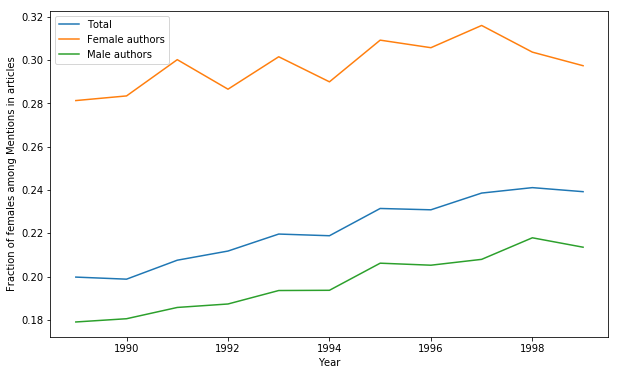

In [22]:
plot_ratio_over_time(df, 'dist', 'f')
plt.gcf().set_size_inches(10, 6)
plt.savefig('Distinct_mentions_over_time.png', dpi=100)

      year  month   dist_m  dist_f   ment_m   ment_f quotes_m quotes_f  \
            count      sum     sum      sum      sum      sum      sum   
0   1989.0   8510  26359.0  6581.0  40989.0   9379.0     21.0      0.0   
1   1990.0   9127  27819.0  6904.0  42819.0   9656.0  17133.0   4478.0   
2   1991.0   8017  23739.0  6219.0  35976.0   8829.0  82770.0  21018.0   
3   1992.0   7699  24771.0  6657.0  38027.0   9252.0  81191.0  22399.0   
4   1993.0   7699  25385.0  7146.0  38589.0   9728.0  78586.0  24075.0   
5   1994.0   7916  25104.0  7035.0  38136.0   9798.0  89304.0  22332.0   
6   1995.0  10296  27270.0  8214.0  40683.0  11166.0  86973.0  28752.0   
7   1996.0   9494  27308.0  8197.0  41574.0  11352.0  54349.0  15925.0   
8   1997.0   9974  30242.0  9477.0  45758.0  13098.0      0.0      0.0   
9   1998.0   6119  23672.0  7521.0  36053.0  10797.0      0.0      0.0   
10  1999.0   7838  30730.0  9664.0  46625.0  13782.0      2.0      0.0   

   dist_f_ratio ment_f_ratio quotes_f

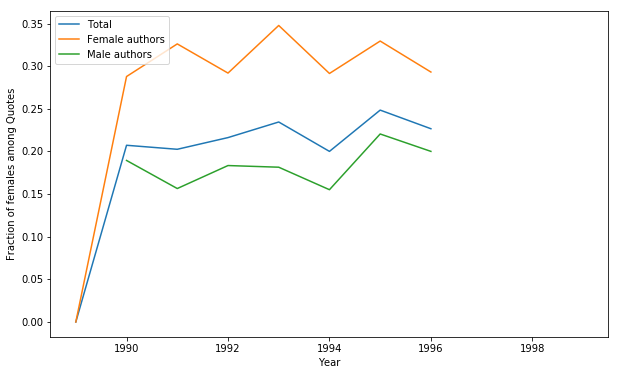

In [23]:
plot_ratio_over_time(df, 'quotes', 'f')
plt.gcf().set_size_inches(10, 6)
plt.savefig('Quotes_over_time.png', dpi=100)

      year  month   dist_m  dist_f   ment_m   ment_f quotes_m quotes_f  \
            count      sum     sum      sum      sum      sum      sum   
0   1989.0   8510  26359.0  6581.0  40989.0   9379.0     21.0      0.0   
1   1990.0   9127  27819.0  6904.0  42819.0   9656.0  17133.0   4478.0   
2   1991.0   8017  23739.0  6219.0  35976.0   8829.0  82770.0  21018.0   
3   1992.0   7699  24771.0  6657.0  38027.0   9252.0  81191.0  22399.0   
4   1993.0   7699  25385.0  7146.0  38589.0   9728.0  78586.0  24075.0   
5   1994.0   7916  25104.0  7035.0  38136.0   9798.0  89304.0  22332.0   
6   1995.0  10296  27270.0  8214.0  40683.0  11166.0  86973.0  28752.0   
7   1996.0   9494  27308.0  8197.0  41574.0  11352.0  54349.0  15925.0   
8   1997.0   9974  30242.0  9477.0  45758.0  13098.0      0.0      0.0   
9   1998.0   6119  23672.0  7521.0  36053.0  10797.0      0.0      0.0   
10  1999.0   7838  30730.0  9664.0  46625.0  13782.0      2.0      0.0   

   dist_f_ratio ment_f_ratio quotes_f

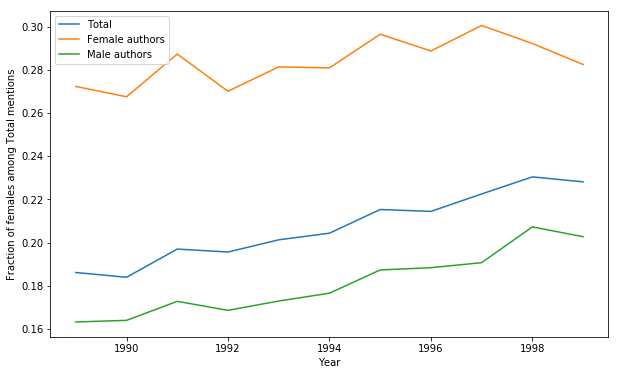

In [24]:
plot_ratio_over_time(df, 'ment', 'f')
plt.gcf().set_size_inches(10, 6)
plt.savefig('total_mentions_over_time.png', dpi=100)